## Introduction to Machine Learning, Homework I 

__Start date: Saturday February 15__

__Due date: Tuesday February 25__

In this homework, we will practice the notions of linear regression and overfitting that we learned during the first two weeks

__The homework is on 30 points + 2 Bonus pts__

### Question I.1 (18pts)

In this first exercise, we will stuy the effect of regularization on noisy linear data. The plot blow represents a set of training points $\left\{\mathbf{x}^{(i)}, t^{(i)}\right\}_{i=1}^N$ in 1D on form which we would like to learn a regression line. 

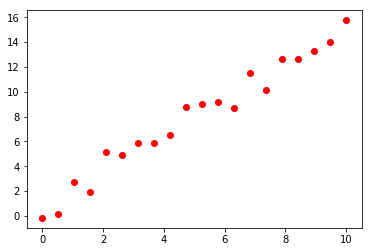

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.linspace(0,10, 20)
y = 1.5*x + 1

noise = np.random.normal(0,1,len(x))

ynoisy = y + noise

plt.scatter(x.reshape(-1,1), ynoisy.reshape(-1,1), facecolor='red')
plt.show()

#### Question I.1 (5pts)

Write a function 'linearRegression_Loss' that takes as input the matrix encoding the prototypes, i.e.

$$\mathbf{X} = \left[
  \begin{array}{ccc}
   - & (\mathbf{x}^{(1)})^{T} & - \\
    - & (\mathbf{x}^{(2)})^{T} & - \\
             & \vdots    &          \\
    - & (\mathbf{x}^{(n)})^{T} & -
  \end{array}
\right]$$

where the dataset is given by $\left\{\mathbf{x}^{(i)}, t_i\right\}$ and each $\mathbf{x}^{(i)}\in \mathbb{R}^D$ with 
$$\mathbf{x}^{(i)} = \left[\begin{array}{c}
x^{(i)}_1\\
\vdots \\
x^{(i)}_n\end{array}\right]$$

The function should implement gradient descent steps on the loss function

$$\ell(\boldsymbol{\beta}) = \frac{1}{2N}\sum_{i=1}^N \left(t^{(i)} - \left(\boldsymbol{\beta}^T\mathbf{x}^{(i)} +\beta_0\right)\right)^2$$

Here $\mathbf{\beta}$ encodes the weights $\beta_1, \beta_2, \ldots, \beta_D$ of the variables $x^{(i)}_1, \ldots, x^{(i)}_{D}$. 

In [6]:
def linearRegression_Loss(X, t):
    
    '''The function should take as input a matrix of sample points X 
    of size n by D (without the column of 1) as well as a vector of targets t 
    and return a vector of regression coefficients beta'''
    
    
    # Put your code here 
    
    
    
    
    
    return beta 
    

#### Question I.2 (3pts)

Apply your function to the dataset show above and display the resulting line.

In [ ]:
'''Displaying the linear regression model'''


#### Question I.3 (5pts)

We now want to study how a more complex model would behave on our noisy dataset. In order to 
avoid bad surprises, we will start by augmenting your model with a regularization term.

Extend your function 'linearRegression_Loss' with an parameter 'reg' to which we can assign one of the following values 
- 'ridge'
- 'lasso'
- 'none'

Corresponding to the following models (the last choice encoding the OLS formulation given earlier)

$$\ell_{\text{Ridge}}(\mathbf{\beta})  = \frac{1}{2N}\sum_{i=1}^N \left(t^{(i)} - \left(\mathbf{\beta}^T\mathbf{x}^{(i)} + \beta_0\right)\right)^2 + \lambda \sum_{i=1}^{D+1} |\beta_i|^2$$

$$\ell_{\text{LASSO}}(\mathbf{\beta})  = \frac{1}{2N}\sum_{i=1}^N \left(t^{(i)} - \left(\mathbf{\beta}^T\mathbf{x}^{(i)} + \beta_0\right)\right)^2 + \lambda \sum_{i=1}^{D+1} |\beta_i|$$

Your new function should also take an additional argument encoding the weight of the regularization (we will call it lambdaR).

In [ ]:

def linearRegression_Loss(X, t, reg, lambdaR):
    
    
    
    return beta



#### Question I.4. (5pts) 

Apply your regularized regression implementation to the data above after generating additional features of the form 
$[x^2, x^3, \ldots, x^p]$ for $p = 10$. Note that this implies that your implementation should be able to handle multiple features. 
On that line you should make sure that your gradient algorithm computes a gradient that encodes all the partial derivatives 
$$\text{grad}_{\boldsymbol{\beta}}\ell(\boldsymbol{\beta}) = \left(\frac{\partial \ell(\boldsymbol{\beta})}{\partial \beta_1}, \ldots, \frac{\partial \ell(\boldsymbol{\beta})}{\partial \beta_{D+1}}\right)$$

plot the result without regularization and for the Ridge regression formulation for a few values of $\lambda$ (let's says $\lambda = 0.1, 1, 10$ and $100$)






In [ ]:
'''Use your implementation of linearRegression_Loss below'''

p =10
powers = np.arange(0,p) + 1

x = np.linspace(0,10, 20)
np.power(x, powers)


lambdaR = [0.1, 1, 10, 100]


for i in np.arange(0,len(lambdaR)):

    beta = linearRegression_Loss(X, t, reg, lambdaR):
        
        
        

### Question II. Simplified Stock prediction (12pts)

The lines below can be used to download stock values. As you can see, we will focus on the evolution of the Google stock between December 1st 2004 and October 14th 2005. 

[*********************100%***********************]  1 of 1 downloaded


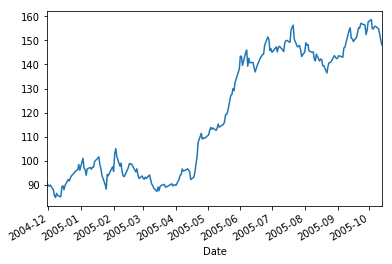

In [10]:
import yfinance as yf
# Get the data of the stock AAPL
data = yf.download('GOOG','2004-12-01','2005-10-14')
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

#### Question II.1. (5pts)

Now that you have tested your linear regression implementations, we will turn to the regression implementation of scikit-learn. In this exercise, we will use scikit learn to fit a simplified prediction model. We will take an order $p$ prediction model for $p=50$, that is a model of the form

$$\text{value}_{t} = \alpha_0 + \sum_{i=1}^{P} \alpha_i\; \text{value}_{t-i}$$

In [ ]:
import scikitlearn as sklearn 
from sklearn import linear_model

from sklearn.linear_model import Ridge


'''Put your code here'''




#### Question II.2. (5pts)

On top of the previous values, we would like to capture seasonal trends. Although we would ideally need more than one year of data, we stick to the dataset that you downloaded above. Add a variable to your model that encodes the day of the year at which the stock value is measured. I.e. we want a model of the form

$$\text{value}_{t} = \alpha_0 + \sum_{i=1}^{P} \alpha_i\; \text{value}_{t-i} + \alpha_{P+1} t$$

where $t_i$ encodes the time information (this should be a single number between $1$ and $365$)

In [ ]:
'''put your updated model here'''




#### Question II.3. (2pts)

Once you have learned your models, load the the history of google stocks for the year 2006 and apply your model to get the predicted prices for all $t = '01-01-2006'$ to $t = '12-01-2006'$. Then compute the prediction error as 

$$\text{err} = \frac{1}{365}\sum_{t=1}^{365} (\hat{\text{value}}_{\text{pred}, t} - \text{value}_t)^2$$

In [ ]:
error = # compte with your code 

print "Prediction error: {}".format(error)

### Bonus (2pts) 

A popular family of models for time series analysis is the family of ARMA models. The extension of those models to non stationnarity is known as ARIMA (for Autoregressive Integrated Moving Average). It is possible to access those models through the 'statsmodels' module : https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html

Try to improve your predictions by fitting an ARIMA model to your data.